In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## About the dataset

The dataset consists of advertising costs via diffrent source of media aka TV, Radio and News and the sales happened due to the advertisement

# Simple Linear Regression

In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

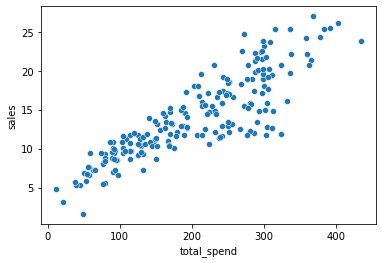

In [4]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

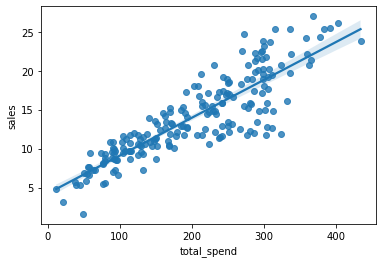

In [5]:
sns.regplot(x='total_spend',y='sales',data=df)

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend = np.linspace(0,500,100)

In [9]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

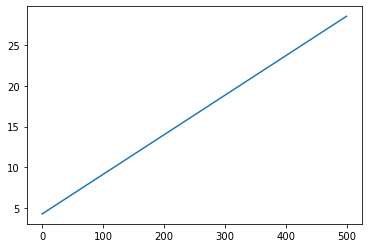

In [10]:
plt.plot(potential_spend,predicted_sales)

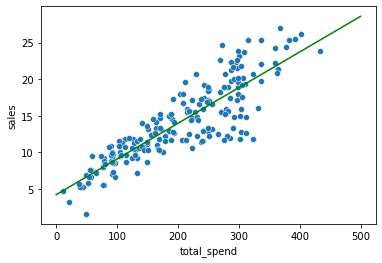

In [11]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='green')

In [12]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [13]:
predicted_sales

13.98060422

# Co-efficient of 3 values(Multiple Linear Regression of 3 values)

In [14]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
potential_spend = np.linspace(0,500,100)

In [16]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

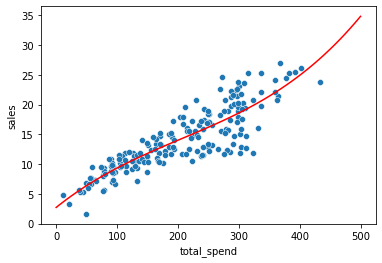

In [17]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

# Linear Regression

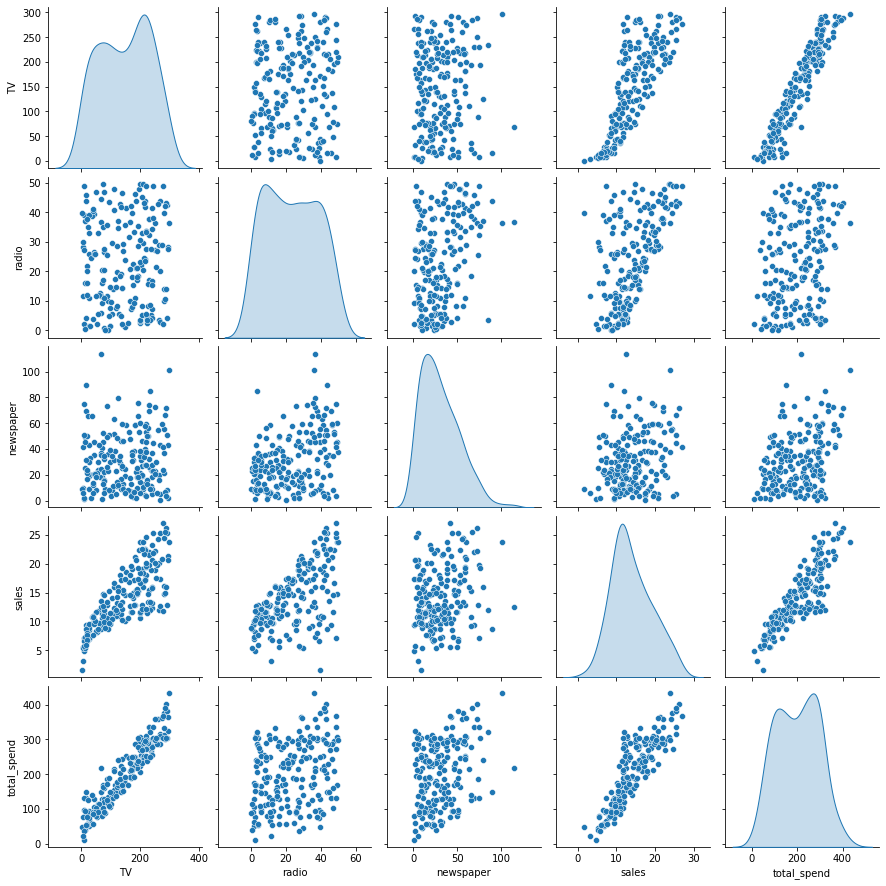

In [18]:
sns.pairplot(df,diag_kind='kde')

In [19]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
X_train

,TV,radio,newspaper,total_spend
85,193.2,18.4,65.7,277.3
183,287.6,43.0,71.8,402.4
127,80.2,0.0,9.2,89.4
53,182.6,46.2,58.7,287.5
100,222.4,4.3,49.8,276.5
...,...,...,...,...
63,102.7,29.6,8.4,140.7
70,199.1,30.6,38.7,268.4
81,239.8,4.1,36.9,280.8
11,214.7,24.0,4.0,242.7


In [23]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [24]:
X_test

,TV,radio,newspaper,total_spend
37,74.7,49.4,45.7,169.8
109,255.4,26.9,5.5,287.8
31,112.9,17.4,38.6,168.9
89,109.8,47.8,51.4,209.0
66,31.5,24.6,2.2,58.3
119,19.4,16.0,22.3,57.7
54,262.7,28.8,15.9,307.4
74,213.4,24.6,13.1,251.1
145,140.3,1.9,9.0,151.2
142,220.5,33.2,37.9,291.6


In [25]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Model Creation

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [32]:
MAE


1.213745773614481

In [33]:
MSE


2.2987166978863827

In [34]:
RMSE

1.5161519375993893

In [35]:
df['sales'].mean()

14.022500000000003

In [36]:
test_predictions = model.predict(X_test)
test_res = y_test - test_predictions

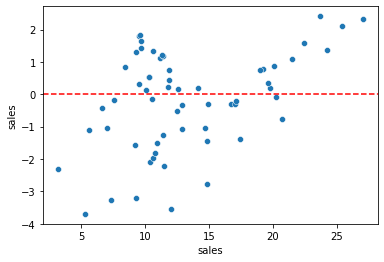

In [37]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
len(test_res)

60

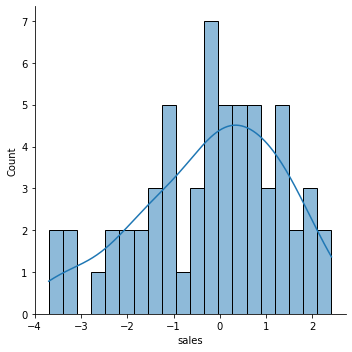

In [39]:
sns.displot(test_res,bins=20,kde=True)

In [40]:
y_hat = model.predict(X)

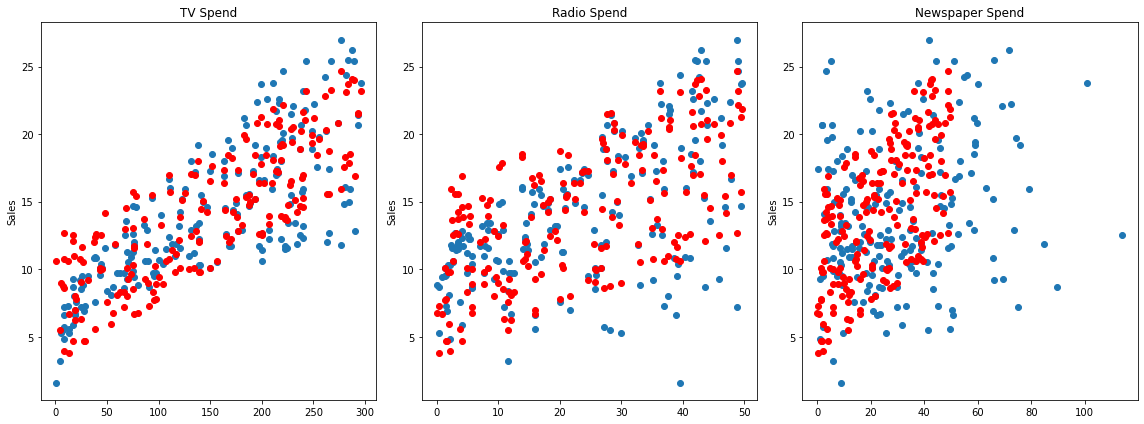

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

We can clearly see from the above graph that Tv and Radio has some kind of positive correlation with the sales but Newspaper does'nt contribute much to the sales.

# Polynomial Regression

In [42]:
X = df.drop('sales',axis=1)
y = df['sales']

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [45]:
poly_features = polynomial_converter.fit_transform(X)

In [46]:
poly_features.shape


(200, 14)

In [47]:
X.shape

(200, 4)

In [48]:
X.iloc[10]

TV             66.1
radio           5.8
newspaper      24.2
total_spend    96.1
Name: 10, dtype: float64

In [49]:
poly_features[10]

array([6.61000e+01, 5.80000e+00, 2.42000e+01, 9.61000e+01, 4.36921e+03,
       3.83380e+02, 1.59962e+03, 6.35221e+03, 3.36400e+01, 1.40360e+02,
       5.57380e+02, 5.85640e+02, 2.32562e+03, 9.23521e+03])

In [50]:
poly_features[10][:3]

array([66.1,  5.8, 24.2])

In [51]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [53]:
model = LinearRegression(fit_intercept=True)

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
error_of_train =[]
error_of_test=[]

In [58]:
i=1
while(i<=30):
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.25, random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
    error_of_train.append(rmse_train)
    error_of_test.append(rmse_test)
    i=i+1

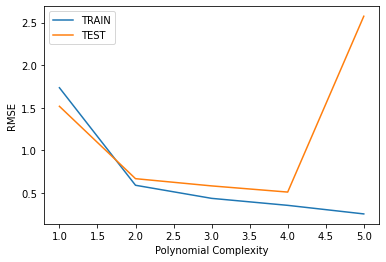

In [61]:
plt.plot(range(1,6),error_of_train[:5],label='TRAIN')
plt.plot(range(1,6),error_of_test[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

The above graph shows the relationship between the training adn testing data for the sales dataset